# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## 读入MNIST数据集

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [21]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [22]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))
print(type(data_train))
x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>


## 超参数设置

In [23]:
batch_size = 100
max_epoch = 30
init_std = 0.001

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [24]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [27]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [28]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [0][30]	 Batch [0][550]	 Training Loss 3.4739	 Accuracy 0.1300
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [2][30]	 Batch [50][550]	 Training Loss 0.8879	 Accuracy 0.4522
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLaye

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [2][30]	 Batch [300][550]	 Training Loss 0.8768	 Accuracy 0.4689
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [3][30]	 Batch [100][550]	 Training Loss 0.8356	 Accuracy 0.5547
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [3][30]	 Batch [350][550]	 Training Loss 0.8319	 Accuracy 0.5583
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

Epoch [4][30]	 Batch [150][550]	 Training Loss 0.8051	 Accuracy 0.6177
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [4][30]	 Batch [400][550]	 Training Loss 0.8024	 Accuracy 0.6203
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [5][30]	 Batch [200][550]	 Training Loss 0.7849	 Accuracy 0.6623
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [5][30]	 Batch [450][550]	 Training Loss 0.7838	 Accuracy 0.6623
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100,

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)

Epoch [5]	 Average training loss 0.7829	 Average training accuracy 0.6655
Epoch [5]	 Average validation loss 0.7623	 Average validation accuracy 0.7286

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [6][30]	 Batch [0][550]	 Training Loss 0.7580	 Accuracy 0.7200
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)


FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [6][30]	 Batch [250][550]	 Training Loss 0.7715	 Accuracy 0.6941
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [6][30]	 Batch [500][550]	 Training Loss 0.7718	 Accuracy 0.6941
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 


Epoch [8]	 Average training loss 0.7596	 Average training accuracy 0.7330
Epoch [8]	 Average validation loss 0.7443	 Average validation accuracy 0.7894

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [9][30]	 Batch [0][550]	 Training Loss 0.7411	 Accuracy 0.7700
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)


FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [9][30]	 Batch [500][550]	 Training Loss 0.7576	 Accuracy 0.7451
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLaye

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [10][30]	 Batch [50][550]	 Training Loss 0.7520	 Accuracy 0.7612
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLaye

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [10][30]	 Batch [300][550]	 Training Loss 0.7549	 Accuracy 0.7563
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [11][30]	 Batch [100][550]	 Training Loss 0.7524	 Accuracy 0.7711
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [11][30]	 Batch [350][550]	 Training Loss 0.7571	 Accuracy 0.7622
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [12][30]	 Batch [150][550]	 Training Loss 0.7561	 Accuracy 0.7708
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [12][30]	 Batch [400][550]	 Training Loss 0.7588	 Accuracy 0.7682
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [13][30]	 Batch [200][550]	 Training Loss 0.7595	 Accuracy 0.7749
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [13][30]	 Batch [450][550]	 Training Loss 0.7619	 Accuracy 0.7724
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [14][30]	 Batch [250][550]	 Training Loss 0.7627	 Accuracy 0.7764
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [14][30]	 Batch [500][550]	 Training Loss 0.7654	 Accuracy 0.7749
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [15][30]	 Batch [50][550]	 Training Loss 0.7630	 Accuracy 0.7859
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLaye

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [15][30]	 Batch [300][550]	 Training Loss 0.7663	 Accuracy 0.7779
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLay

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [16][30]	 Batch [100][550]	 Training Loss 0.7671	 Accuracy 0.7867
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [17][30]	 Batch [400][550]	 Training Loss 0.7760	 Accuracy 0.7795
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [18][30]	 Batch [200][550]	 Training Loss 0.7785	 Accuracy 0.7821
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLay

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(1

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)

Epoch [18]	 Average training loss 0.7814	 Average training accuracy 0.7798
Epoch [18]	 Average validation loss 0.7734	 Average validation accuracy 0.8286

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [19][30]	 Batch [0][550]	 Training Loss 0.7708	 Accuracy 0.8200
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [20][30]	 Batch [200][550]	 Training Loss 0.7874	 Accuracy 0.7805
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [20][30]	 Batch [450][550]	 Training Loss 0.7898	 Accuracy 0.7788
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)

Epoch [20]	 Average training loss 0.7903	 Average training accuracy 0.7794
Epoch [20]	 Average validation loss 0.7831	 Average validation accuracy 0.8274

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [21][30]	 Batch [0][550]	 Training Loss 0.7805	 Accuracy 0.8200
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [22][30]	 Batch [200][550]	 Training Loss 0.7964	 Accuracy 0.7770
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [22][30]	 Batch [450][550]	 Training Loss 0.7986	 Accuracy 0.7764
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)

Epoch [22]	 Average training loss 0.7991	 Average training accuracy 0.7771
Epoch [22]	 Average validation loss 0.7926	 Average validation accuracy 0.8262



FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [23][30]	 Batch [250][550]	 Training Loss 0.8009	 Accuracy 0.7745
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLay

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(1

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [25][30]	 Batch [250][550]	 Training Loss 0.8095	 Accuracy 0.7710
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 10)
Epoch [25][30]	 Batch [500][550]	 Training Loss 0.8117	 Accuracy 0.7710
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(1

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [26][30]	 Batch [450][550]	 Training Loss 0.8155	 Accuracy 0.7688
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [27][30]	 Batch [250][550]	 Training Loss 0.8176	 Accuracy 0.7650
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [27][30]	 Batch [500][550]	 Training Loss 0.8197	 Accuracy 0.7659
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [28][30]	 Batch [50][550]	 Training Loss 0.8193	 Accuracy 0.7682
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLay

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer 

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [29][30]	 Batch [250][550]	 Training Loss 0.8253	 Accuracy 0.7596
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer -

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
Epoch [29][30]	 Batch [500][550]	 Training Loss 0.8272	 Accuracy 0.7607
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLa

In [29]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
(100, 12

## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [0][20]	 Batch [0][550]	 Training Loss 2.0192	 Accuracy 0.1000
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.4670	 Accuracy 0.1604
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLaye

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCL

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCL

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [2][20]	 Batch [150][550]	 Training Loss 0.9022	 Accuracy 0.5407
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCL

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCL

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [3][20]	 Batch [400][550]	 Training Loss 0.8123	 Accuracy 0.6299
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCL

Epoch [4][20]	 Batch [100][550]	 Training Loss 0.7684	 Accuracy 0.6832
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(1

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(1

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [6][20]	 Batch [200][550]	 Training Loss 0.7103	 Accuracy 0.7461
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLaye

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [6][20]	 Batch [350][550]	 Training Loss 0.7096	 Accuracy 0.7452
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [6][20]	 Batch [500][550]	 Training Loss 0.7078	 Accuracy 0.7477
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [7][20]	 Batch [50][550]	 Training Loss 0.6857	 Accuracy 0.7806
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward


FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCL

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCL

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(1

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)

Epoch [8]	 Average training loss 0.6747	 Average training accuracy 0.7858
Epoch [8]	 Average validation loss 0.6470	 Average validation accuracy 0.8378

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [9][20]	 Batch [0][550]	 Training Loss 0.6271	 Accuracy 0.8300
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 1

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.6629	 Accuracy 0.7974
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(1

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)

Epoch [9]	 Average training loss 0.6635	 Average training accuracy 0.7983
Epoch [9]	 Av

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [11][20]	 Batch [350][550]	 Training Loss 0.6483	 Accuracy 0.8141
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [11][20]	 Batch [500][550]	 Training Loss 0.6484	 Accuracy 0.8159
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [12][20]	 Batch [50][550]	 Training Loss 0.6349	 Accuracy 0.8359
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [13][20]	 Batch [300][550]	 Training Loss 0.6367	 Accuracy 0.8268
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [13][20]	 Batch [450][550]	 Training Loss 0.6386	 Accuracy 0.8271
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)

Epoch [13]	 Average training loss 0.6385	 Average training accuracy 0.8275
Epoch [13]	 Average validation loss 0.6146	 Average validation accuracy 0.8714

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [14][20]	 Batch [0][550]	 Training Loss 0.6014	 Accuracy 0.8700
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLay

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [14][20]	 Batch [150][550

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCL

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(1

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(1

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [15][20]	 Batch [350][550]	 Training Loss 0.6330	 Accuracy 0.8328
FCLayer - forwar

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [16][20]	 Batch [50][550]	 Training Loss 0.6229	 Accuracy 0.8449
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [16][20]	 Batch [200][550]	 Training Loss 0.6296	 Accuracy 0.8364
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [16][20]	 Batch [350][550]	 Training Loss 0.6315	 Accuracy 0.8350
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [16][20]	 Batch [500][550

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [17][20]	 Batch [200][550]	 Training Loss 0.6286	 Accuracy 0.8373
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forwar

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [17][20]	 Batch [350][550]	 Training Loss 0.6306	 Accuracy 0.8363
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLay

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.6215	 Accuracy 0.8473
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.6281	 Accuracy 0.8391
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forwar

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.6302	 Accuracy 0.8378
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forwar

(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(1

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [19][20]	 Batch [50][550]	 Training Loss 0.6216	 Accuracy 0.8494
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward

FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [19][20]	 Batch [200][550]	 Training Loss 0.6281	 Accuracy 0.8403
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forwar

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
Epoch [19][20]	 Batch [350][550

FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FC

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(100, 128)
FCLayer - forward
(100, 10)
FCLayer - forward
(1

## 绘制曲线

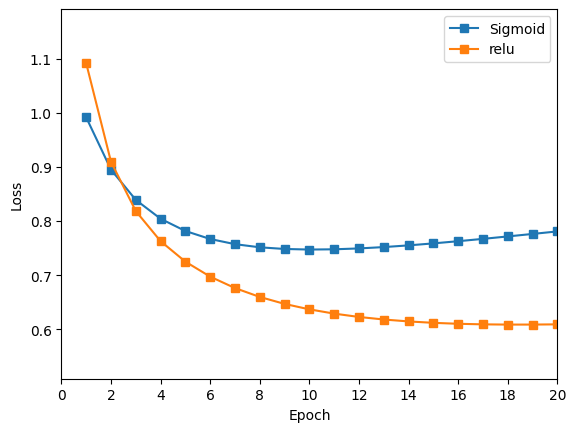

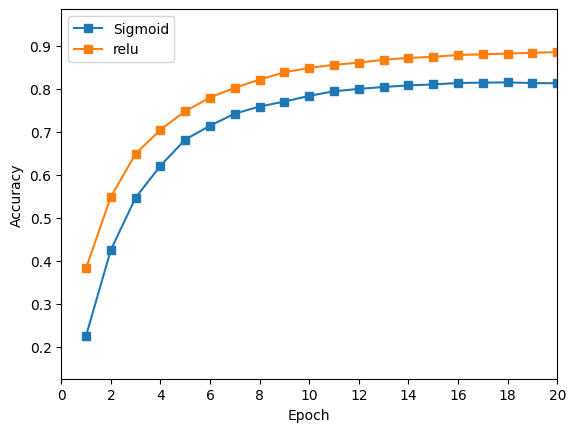

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [15]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

FCLayer - forward
(100, 128)
(100, 128)
FCLayer - forward
(100, 10)
SoftmaxCrossEntropyLossLayer--forward


NameError: name 'predic_y' is not defined

### 测试

In [ ]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [ ]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [ ]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

In [ ]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

## 绘制曲线

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.